In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
datatestnocrop = r"D:\InceptionNet\DATATEST100 class\100classtestnocrop"
datacob = r"D:\InceptionNet\mediamdata"
#C:\InceptionNet\mediamdata 

In [2]:
def Nornal224S(image_path):
    """
    รับที่อยู่ไฟล์รูปภาพ แล้วโหลด, ปรับขนาด, และทำ preprocessing
    """
    # 1. อ่านไฟล์รูปภาพจากที่อยู่ (path)
    img = tf.io.read_file(image_path)
    
    # 2. ถอดรหัสไฟล์ให้เป็น tensor ของรูปภาพ
    img = tf.image.decode_jpeg(img, channels=3)
    # 3. ปรับขนาดรูปภาพ (Resize)
    img = tf.image.resize(img, [224, 224])
    # 4. แปลงประเภทข้อมูลและทำ Normalization
    img = tf.cast(img, tf.float32)
    img = img / 255.0  # Normalization
    img = tf.clip_by_value(img, 0.0, 1.0)
    # 5. กำหนด shape เพื่อป้องกัน error
    img.set_shape((224, 224, 3))
    
    return img

In [23]:
model44 = load_model(r'D:\final_facenet\trian\facenet\resnet\modelR9.h5')

In [24]:
import os
def loadclass(dataset_path):
    
    #สร้าง dictionary 
    class_image_paths = {}
    for class_name in os.listdir(dataset_path): #os.listdir ดึงรายชื่อไฟล์/โฟเดอร์ใน paht
        class_dir = os.path.join(dataset_path, class_name)#os.path.join = images\photo.jpg
        #print(class_dir)
        if os.path.isdir(class_dir):#ตรวจสอบclass_dir เป็นโฟลเดอร์ถ้าเป็นโฟลเดอร์ จะเข้าไปทำงานต่อ
            image_files = [ 
                os.path.join(class_dir, img) #
                for img in os.listdir(class_dir) # ดึงรายชื่อ
                if img.lower().endswith(('.jpg', '.jpeg', '.png')) #
            ]
            if len(image_files) >= 2:  # ขั้นต่ำ 3 ภาพผป
                class_image_paths[class_name] = image_files # สร้าง dictionary

    return class_image_paths

In [25]:
data = loadclass(datatestnocrop)

In [26]:
print(len(data))

101


In [27]:
classes = list(data.keys())

In [28]:
print(classes)

['101680', '101917', '103158', '1064', '106807', '1074', '10852', '108520', '112586', '117062', '120419', '123634', '126232', '127693', '130661', '13458', '136469', '138696', '139360', '139462', '145444', '161193', '162577', '163911', '164330', '166794', '173900', '176547', '176820', '180614', '182838', '193428', '195737', '2003', '200374', '202306', '202728', '215202', '215808', '220549', '222506', '224257', '225925', '233751', '235249', '237834', '241278', '243626', '250725', '253386', '260543', '260934', '261136', '264885', '267875', '272243', '272945', '273806', '274869', '27848', '27896', '280309', '281494', '281965', '290618', '293528', '293748', '29493', '30787', '310600', '330507', '33206', '333381', '334241', '335616', '336343', '344825', '349511', '351592', '358', '37083', '37417', '38840', '40106', '4059', '42639', '47244', '51808', '65088', '70269', '70772', '73790', '79538', '79916', '80004', '8966', '90382', '9322', '93387', '95217', '99626']


In [29]:
smae_eculidean = []
smae_cosine = []
smae_embedding1 = []
smae_embedding2 = []

sameeculidean = 0
samecosine = 0
intx = 0
for image in classes:
    pathim = data[image]
    intx = intx+1
    if len(pathim) >=2:
        img1_path = pathim[0]
        img2_path = pathim[1]
        img1 = Nornal224S(img1_path)
        img2 = Nornal224S(img2_path)
        img1 = tf.expand_dims(img1, axis=0)
        img2 = tf.expand_dims(img2, axis=0)
        em1 = model44.predict(img1).squeeze()
        em2 = model44.predict(img2).squeeze()
        #embedding1 = model.predict(tf.expand_dims(img1, axis=0))[0]
        #embedding2 = model.predict(tf.expand_dims(img2, axis=0))[0]
        smae_embedding1.append(em1)
        smae_embedding2.append(em2)
        euclidean_dist = np.linalg.norm(em1 - em2)
        smae_eculidean.append(euclidean_dist)

        dot_product = np.dot(em1, em2)
        norm_product = np.linalg.norm(em1) * np.linalg.norm(em2)
        cosine_sim = dot_product / (norm_product + 1e-8)
        smae_cosine.append(cosine_sim)



1/1 [==============================] - 0s 47ms/step


In [30]:
#print(embedding1)
print(type(smae_embedding1[0]))

<class 'numpy.ndarray'>


In [31]:
import random

negative_pairs = []

classes_list = list(data.keys())  # data = dict ที่มี key = class_name

num_negatives = 100  # จะสร้างกี่คู่ negative

for _ in range(num_negatives):
    # เลือก 2 class ต่างกัน
    class1, class2 = random.sample(classes_list, 2)
    
    # เลือกภาพ 1 ใบจากแต่ละ class
    img1_path = random.choice(data[class1])
    img2_path = random.choice(data[class2])
    
    # เพิ่มเข้าลิส
    negative_pairs.append((img1_path, img2_path))


In [32]:
euclidean_diff = []
cosine_diff = []
diff_embedding1 =[]
diff_embedding2 =[]

for img1_path, img2_path in negative_pairs:
    img1 = Nornal224S(img1_path)
    img2 = Nornal224S(img2_path)
    
    img1 = tf.expand_dims(img1, axis=0)
    img2 = tf.expand_dims(img2, axis=0)
    
    em1 = model44.predict(img1)[0]  #ตัด batch
    em2 = model44.predict(img2)[0]
    diff_embedding1.append(em1)
    diff_embedding2.append(em2)
    # Euclidean
    euclidean_dist = np.linalg.norm(em1 - em2)
    euclidean_diff.append(euclidean_dist)
    
    # Cosine
    dot_product = np.dot(em1, em2)
    norm_product = np.linalg.norm(em1) * np.linalg.norm(em2)
    cosine_sim = dot_product / (norm_product + 1e-8)
    cosine_diff.append(cosine_sim)


1/1 [==============================] - 0s 36ms/step


In [33]:
print(cosine_diff)
print(euclidean_diff)

[0.40104224287024254, 0.9176665452743233, 0.748278729585389, 0.6454737891349224, 0.684748783982741, 0.7627126498245032, 0.8219522049457734, 0.5686036969310952, 0.8194574250938301, 0.7195484231934937, 0.6827146342670615, 0.6431532821208278, 0.9579298400453354, 0.41894575051416855, 0.8365323958507507, 0.6287840320641742, 0.8138139166512895, 0.7984003344804437, 0.7557996435879387, 0.7149993962074398, 0.7762730969374882, 0.8669154477996331, 0.6379232342823888, 0.7135644483735414, 0.8270452535894414, 0.9790806063901268, 0.7812599331251542, 0.9535202260938929, 0.8449600850486292, 0.9424657658822545, 0.8860428244678189, 0.8872445733037628, 0.6568008782511267, 0.2807023664479449, 0.7935022632403619, 0.9461546413550516, 0.7403216729233447, 0.7642444610756622, 0.8488031540867366, 0.7619389219384112, 0.8864797265096535, 0.5090095057256151, 0.9627418421792222, 0.8104074177300006, 0.862864835149058, 0.9897361292651868, 0.673330300273533, 0.3561712765839324, 0.48360001557263027, 0.9605874323153598, 

In [34]:
print(smae_cosine)
print(smae_eculidean)

[0.9578005550568275, 0.9524583692945463, 0.9631054305087162, 0.6669065091024734, 0.9498607391417354, 0.7101235914743562, 0.8297343171115924, 0.8059134998792501, 0.9234485488247627, 0.9952053921364327, 0.9873844882455094, 0.9940333863037153, 0.8622166942096195, 0.7783613591059442, 0.7608697791824944, 0.792224923331239, 0.9164708115287139, 0.9519260430510826, 0.9755602948337037, 0.8547753010149302, 0.9752114898918957, 0.8895417362904348, 0.7196981834921051, 0.9892038597609395, 0.9252187517150672, 0.9182802346907939, 0.9619386650616408, 0.9806020161796977, 0.9620139480003589, 0.8689699086076642, 0.9538393521292396, 0.8938189592278613, 0.9402643908568741, 0.8762629466802131, 0.9155920551760943, 0.8079225707231895, 0.9267503482858801, 0.6915556535441796, 0.8947859254280184, 0.9201368597523363, 0.9002781897494055, 0.89911160751446, 0.965636360861627, 0.9205746558638336, 0.9535240380211644, 0.9249477293979838, 0.9159344889084209, 0.923670154355417, 0.9073725252013297, 0.9619238853776357, 0.99

In [35]:
import matplotlib.pyplot as plt

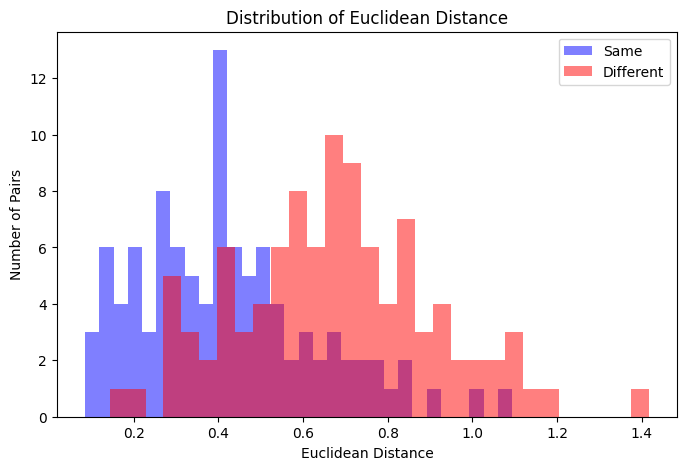

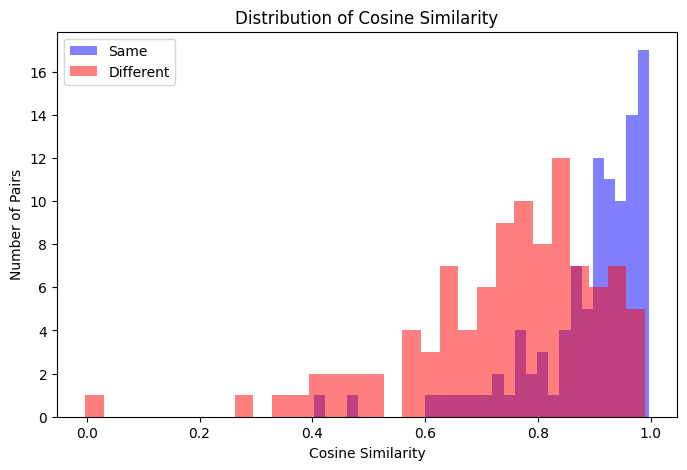

In [36]:
#eculidean
plt.figure(figsize=(8,5))
plt.hist(smae_eculidean, bins=30, alpha=0.5, label='Same', color='blue')
plt.hist(euclidean_diff, bins=30, alpha=0.5, label='Different', color='red')
plt.title("Distribution of Euclidean Distance")
plt.xlabel("Euclidean Distance")
plt.ylabel("Number of Pairs")
plt.legend()
plt.show()

#cosine
plt.figure(figsize=(8,5))
plt.hist(smae_cosine, bins=30, alpha=0.5, label='Same', color='blue')
plt.hist(cosine_diff, bins=30, alpha=0.5, label='Different', color='red')
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Pairs")
plt.legend()
plt.show()


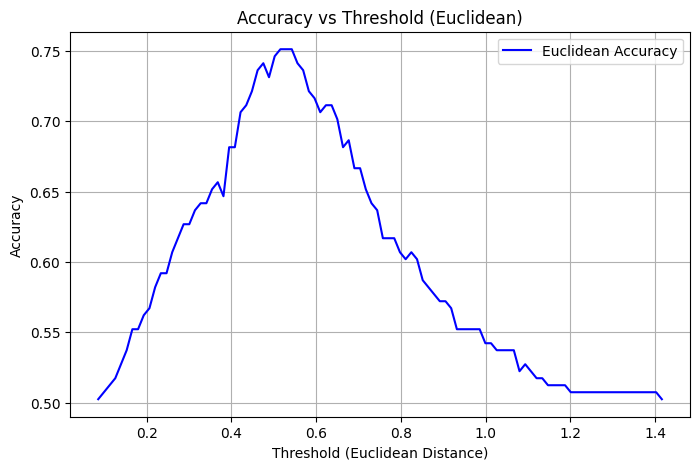

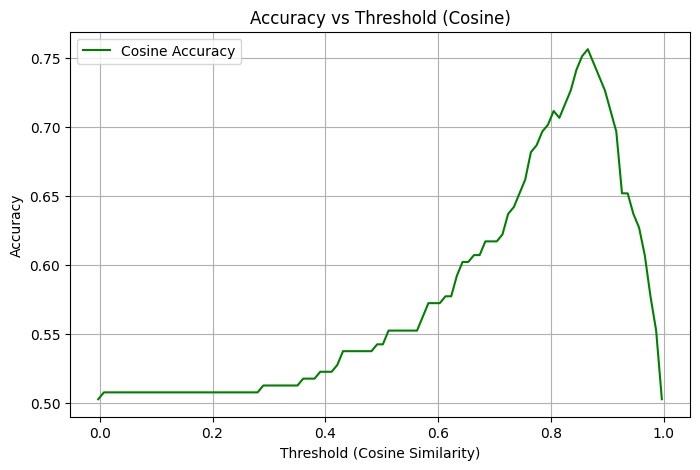

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# สมมติว่าคุณมี
# euclidean_same, euclidean_diff, cosine_same, cosine_diff

def accuracy_vs_threshold(distance_same, distance_diff, metric_type='euclidean'):
    all_values = distance_same + distance_diff  # สำหรับหา range threshold
    min_val, max_val = min(all_values), max(all_values)
    
    thresholds = np.linspace(min_val, max_val, 100)
    accuracies = []

    for t in thresholds:
        if metric_type == 'euclidean':
            # Euclidean: smaller = same
            correct_same = np.sum(np.array(distance_same) <= t)
            correct_diff = np.sum(np.array(distance_diff) > t)
        elif metric_type == 'cosine':
            # Cosine: larger = same
            correct_same = np.sum(np.array(distance_same) >= t)
            correct_diff = np.sum(np.array(distance_diff) < t)
        else:
            raise ValueError("metric_type must be 'euclidean' or 'cosine'")
        
        acc = (correct_same + correct_diff) / (len(distance_same) + len(distance_diff))
        accuracies.append(acc)
    
    return thresholds, accuracies

# -----------------------------
# Plot Euclidean Accuracy vs Threshold
# -----------------------------
thresholds_euc, acc_euc = accuracy_vs_threshold(smae_eculidean, euclidean_diff, 'euclidean')

plt.figure(figsize=(8,5))
plt.plot(thresholds_euc, acc_euc, label='Euclidean Accuracy', color='blue')
plt.xlabel('Threshold (Euclidean Distance)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold (Euclidean)')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Plot Cosine Accuracy vs Threshold
# -----------------------------
thresholds_cos, acc_cos = accuracy_vs_threshold(smae_cosine, cosine_diff, 'cosine')

plt.figure(figsize=(8,5))
plt.plot(thresholds_cos, acc_cos, label='Cosine Accuracy', color='green')
plt.xlabel('Threshold (Cosine Similarity)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold (Cosine)')
plt.grid(True)
plt.legend()
plt.show()


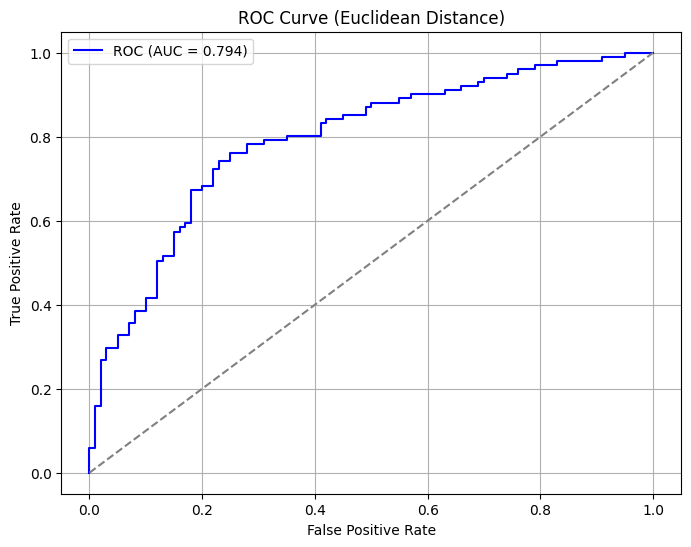

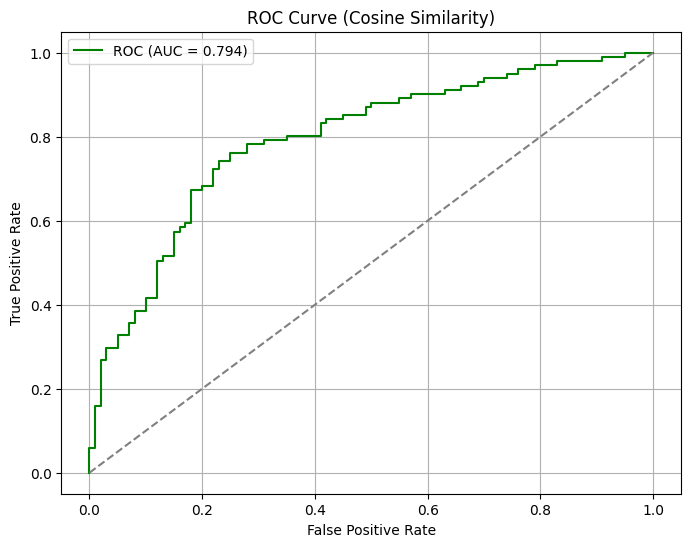

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



y_true_euc = [1]*len(smae_eculidean) + [0]*len(euclidean_diff)  # 1 = same, 0 = different
y_score_euc = [-d for d in smae_eculidean] + [-d for d in euclidean_diff]  # Euclidean: smaller distance = more likely same

y_true_cos = [1]*len(smae_cosine) + [0]*len(cosine_diff)
y_score_cos = list(smae_cosine) + list(cosine_diff)  # Cosine: larger similarity = more likely same


fpr_euc, tpr_euc, thresholds_euc = roc_curve(y_true_euc, y_score_euc)
auc_euc = roc_auc_score(y_true_euc, y_score_euc)

plt.figure(figsize=(8,6))
plt.plot(fpr_euc, tpr_euc, color='blue', label=f'ROC (AUC = {auc_euc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')  # เส้นสุ่ม
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Euclidean Distance)')
plt.legend()
plt.grid(True)
plt.show()


fpr_cos, tpr_cos, thresholds_cos = roc_curve(y_true_cos, y_score_cos)
auc_cos = roc_auc_score(y_true_cos, y_score_cos)

plt.figure(figsize=(8,6))
plt.plot(fpr_cos, tpr_cos, color='green', label=f'ROC (AUC = {auc_cos:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cosine Similarity)')
plt.legend()
plt.grid(True)
plt.show()


eucdent_theshold = 0.62
cosins_theshold = 0.78

thebest EP44
eucdent_theshold = 0.65
cosins_theshold = 0.78

In [39]:
from sklearn.metrics import precision_score

In [45]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


y_true = [1]*len(smae_eculidean) + [0]*len(euclidean_diff)
y_pred_euc = [1 if d <= 0.60 else 0 for d in smae_eculidean + euclidean_diff]

# Cosine: larger similarity = same
y_pred_cos = [1 if s >= 0.80 else 0 for s in smae_cosine + cosine_diff]

# ==== Euclidean metrics ====
acc_euc = accuracy_score(y_true, y_pred_euc)
prec_euc = precision_score(y_true, y_pred_euc)
rec_euc = recall_score(y_true, y_pred_euc)
f1_euc = f1_score(y_true, y_pred_euc)
auc_euc = roc_auc_score(y_true, [-d for d in smae_eculidean + euclidean_diff])  # note: -distance

# ==== Cosine metrics ====
acc_cos = accuracy_score(y_true, y_pred_cos)
prec_cos = precision_score(y_true, y_pred_cos)
rec_cos = recall_score(y_true, y_pred_cos)
f1_cos = f1_score(y_true, y_pred_cos)
auc_cos = roc_auc_score(y_true, smae_cosine + cosine_diff)

# ==== แสดงผล ====
print("=== Euclidean Metrics ===")
print(f"Accuracy: {acc_euc:.4f}, Precision: {prec_euc:.4f}, Recall: {rec_euc:.4f}, F1-score: {f1_euc:.4f}, AUC: {auc_euc:.4f}")

print("\n=== Cosine Metrics ===")
print(f"Accuracy: {acc_cos:.4f}, Precision: {prec_cos:.4f}, Recall: {rec_cos:.4f}, F1-score: {f1_cos:.4f}, AUC: {auc_cos:.4f}")


=== Euclidean Metrics ===
Accuracy: 0.7114, Precision: 0.6807, Recall: 0.8020, F1-score: 0.7364, AUC: 0.7940

=== Cosine Metrics ===
Accuracy: 0.7114, Precision: 0.6720, Recall: 0.8317, F1-score: 0.7434, AUC: 0.7940


=== Euclidean Metrics ===
Accuracy: 0.7313, Precision: 0.6911, Recall: 0.8416, F1-score: 0.7589, AUC: 0.8104

=== Cosine Metrics ===
Accuracy: 0.7264, Precision: 0.6825, Recall: 0.8515, F1-score: 0.7577, AUC: 0.8104